In [1]:
#!/usr/bin/env python3

# scripts.py

# Notebook of scripts for analysis

# Vivian Leung
# Created:      05 Jan 2024
# Last updated: 05 Jan 2024
# Last used:    05 Jan 2024

# Changelog:

# %%
# IMPORTS
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# USER PARAMS

# I/O
PROJECT_DIR = "."

DATA_DIR = f"{PROJECT_DIR}/data"

# Input
COUNTS_TSV = f"{DATA_DIR}/processing_counts.tsv"

# Output
OUT_DIR = f"{PROJECT_DIR}/analysis"

# Params

In [3]:
# SCRIPT

counts = pd.read_csv(COUNTS_TSV, sep="\t")

# cast as ordered for easy sorting in figs
sample_name_dtype = pd.CategoricalDtype(counts.sort_values("order").sample_name, True)
counts["sample_name"] = counts["sample_name"].astype(sample_name_dtype)

# organize
counts.set_index("sample_name", inplace=True)

counts["read1_filter_excluded"] = counts.read1_raw - counts.read1_filtered
counts["read2_filter_excluded"] = counts.read2_raw - counts.read2_filtered

In [4]:
rename_cols = {
    "read1_raw": "raw",
    "read1_filtered": "filtered",
    "read1_filter_excluded": "removed by filter",
    "seqs_classified": "classified",
    "seqs_unclassified": "unclassified",
}
steps = counts[rename_cols.keys()].rename(rename_cols, axis=1).rename_axis(
    "read pairs", axis=1)

steps.style.format("{:,.0f}")


read pairs,raw,filtered,removed by filter,classified,unclassified
sample_name,,,,,
Layer 2,"4,979,865","4,253,187","726,678","3,668,188","584,999"
Layer 3,"13,186,098","11,650,429","1,535,669","10,598,176","1,052,253"
Layer 5,"9,330,824","7,416,872","1,913,952","2,912,828","4,504,044"
Layer 6,"14,922,435","11,118,136","3,804,299","4,674,984","6,443,152"
Layer 7,"9,741,733","7,239,626","2,502,107","1,845,816","5,393,810"
Layer 9,"9,967,804","6,852,636","3,115,168","926,888","5,925,748"
Layer 10,"14,457,881","9,702,797","4,755,084","1,627,376","8,075,421"
Neg 1,"14,243,771","10,231,814","4,011,957","1,417,375","8,814,439"
Neg 2,"5,792,211","4,444,759","1,347,452","576,574","3,868,185"


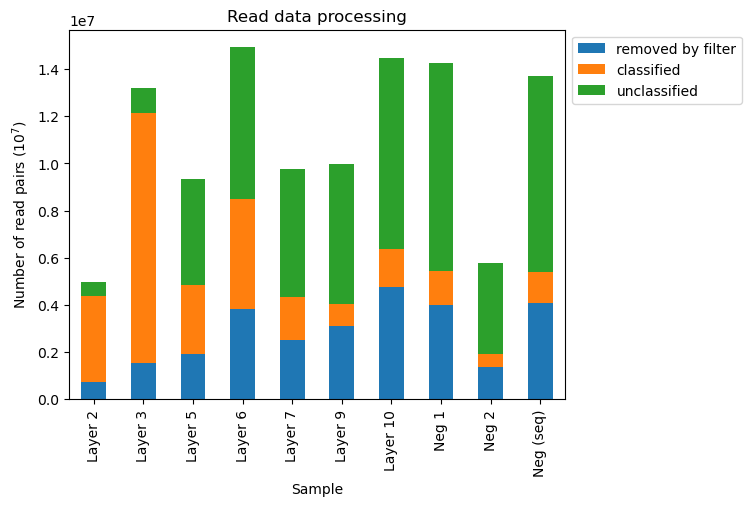

In [5]:

ax_steps_counts = steps.drop(["raw", "filtered"], axis=1).plot(
    kind="bar",
    stacked=True,
    xlabel="Sample",
    ylabel="Number of read pairs ($10^7$)",
    title="Read data processing",
)
ax_steps_counts.legend_ = None
ax_steps_counts.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [6]:
steps_pcts = steps.apply(lambda ser: ser / ser["raw"], axis=1)
steps_pcts.style.format("{:.2f}")


read pairs,raw,filtered,removed by filter,classified,unclassified
sample_name,,,,,
Layer 2,1.00,0.85,0.15,0.74,0.12
Layer 3,1.00,0.88,0.12,0.80,0.08
Layer 5,1.00,0.79,0.21,0.31,0.48
Layer 6,1.00,0.75,0.25,0.31,0.43
Layer 7,1.00,0.74,0.26,0.19,0.55
Layer 9,1.00,0.69,0.31,0.09,0.59
Layer 10,1.00,0.67,0.33,0.11,0.56
Neg 1,1.00,0.72,0.28,0.10,0.62
Neg 2,1.00,0.77,0.23,0.10,0.67


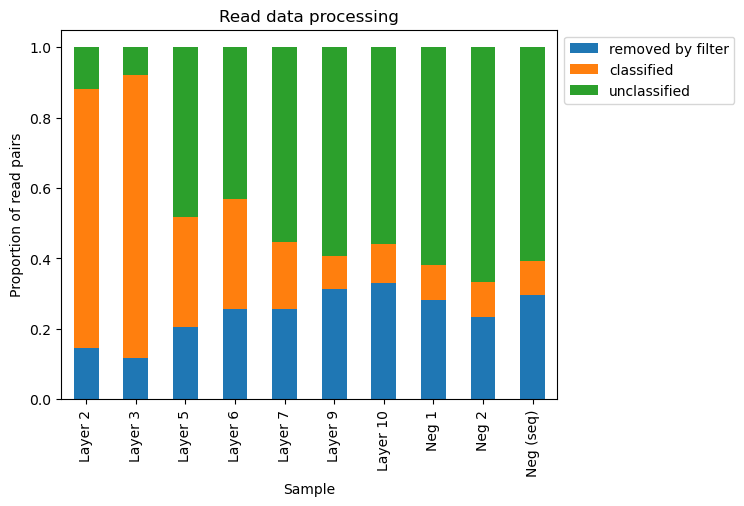

In [7]:
ax_steps_pcts = steps_pcts.drop(["raw", "filtered"], axis=1).plot(
    kind="bar",
    stacked=True,
    xlabel="Sample",
    ylabel="Proportion of read pairs",
    title="Read data processing",
)

# move legend
ax_steps_pcts.legend_ = None
ax_steps_pcts.legend(loc="upper left", bbox_to_anchor=(1, 1))